## INTERVENTION ANALYSIS - A/B TESTING

In order to explain hypothesis testing, we'll use a classic **intervention** example found in most industries. Let’s say we want to conduct an experiment to test if a certain action helps prevent the occurrence of an adverse event.

#![alt text](fig/Capture.PNG)

# T-Z- score


T-TEST AND Z-TEST have the assumption that the distributions are normal

## T-score vs. z-score: When to use a t score

#![alt text](fig/t-score-vs.-z-score.png)

## CONCEPTS 

* The **detectable difference** is the level of impact we want to be able to detect with our test, i.e., difference between test and control, do we need to observe in order to reject the null hypothesis and conclude that the action worked?
* The **power** The test's probability of correctly rejecting the null hypothesis. The complement of the false negative rate, β. 
* **alpha level** is the probability of rejecting the null hypothesis when the null hypothesis is true

## P-VALUE DISCUSSION

The **p-value is the probability** of obtaining **a result at least as “extreme” as the observed result (the statistic Z), given that the null hypothesis is true**. 

Note that we do not have to calculate the p-value in order to reject or accept the null hypothesis. Alternatively, we can apply a cutoff directly to the test statistic based on its distribution and the chosen significance level. For example, for a two-sided test and a significance level of 5%, the cutoff corresponds to the upper and lower 2.5% on the standard normal distribution (normal distribution with a mean of 0 and a standard deviation of 1), which is 1.96. Hence we reject the null hypothesis if |Z|>1.96.

## Alpha

The term alpha value is often used interchangeably with the term p value. Although these two terms are closely
related, there is an important distinction between them. A p value is the largest value of alpha that would result in the rejection of the null hypothesis for a particular set of data. Hence, while the value of alpha is set during the planning of an experiment, the p value is calculated from the data after experiment has been run. 

## Effect size

In general, ES can be measured in two ways:

a) as the standardized difference between two means, or

b) as the correlation between the independent variable classification and the individual scores on the dependent variable. This correlation is called the "effect size correlation" (Rosnow & Rosenthal, 1996).

In [746]:
options(warn=-1)
require(ggplot2)
require(cowplot)
require(scales)
require(dplyr)
source('A_B_testing/Rplots.R')
source('A_B_testing/other_functions.R')

### Consider the following example:

* H0: p1=p2, H1: p1>p2. A one-sided test was chosen here for charting-simplicity.
* Our chosen significance level is 5%. The corresponding decision rule is |Z|>1.65. The number (1.65) is the cutoff that corresponds to the upper 5% on the standard normal distribution.
* N=5,000 (2,500 in each cell).
* Say we decide that we need to observe a difference of 0.02 in order to be satisfied that the intervention worked (i.e., p1=0.10 and p2=0.08). 
* The desired difference of 0.02 under the alternative hypothesis corresponds to Z=2.47 (using the formula of Z for proportions). 
* We are assuming that the variance is roughly the same under the null and alternative hypotheses (they’re very close).

In [747]:
n1 = 2500
n2 = 2500
p1 = 0.10
p2 = 0.08
Z = (p1 - p2)/sqrt(p1*(1-p1)*(1/n1) + p2*(1-p2)*(1/n2)) # where is 1 we have the sd.
Z ##is the detectable difference, the size of the effect that we are looking for

[1] 2,472341

In [748]:
# power of the test
power_calculator_binary(p1=p1, p0=p2, N=n1+n2)
power.prop.test(p1 = p1, p2 = p2, n = n1)

[1] 0,695811


     Two-sample comparison of proportions power calculation 

              n = 2500
             p1 = 0,1
             p2 = 0,08
      sig.level = 0,05
          power = 0,6953872
    alternative = two.sided

NOTE: n is number in *each* group


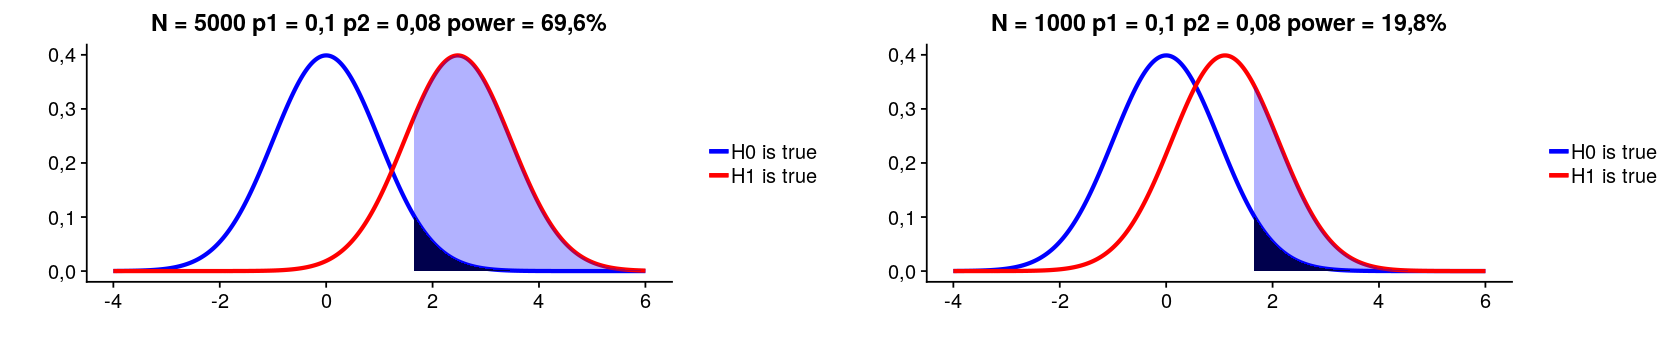

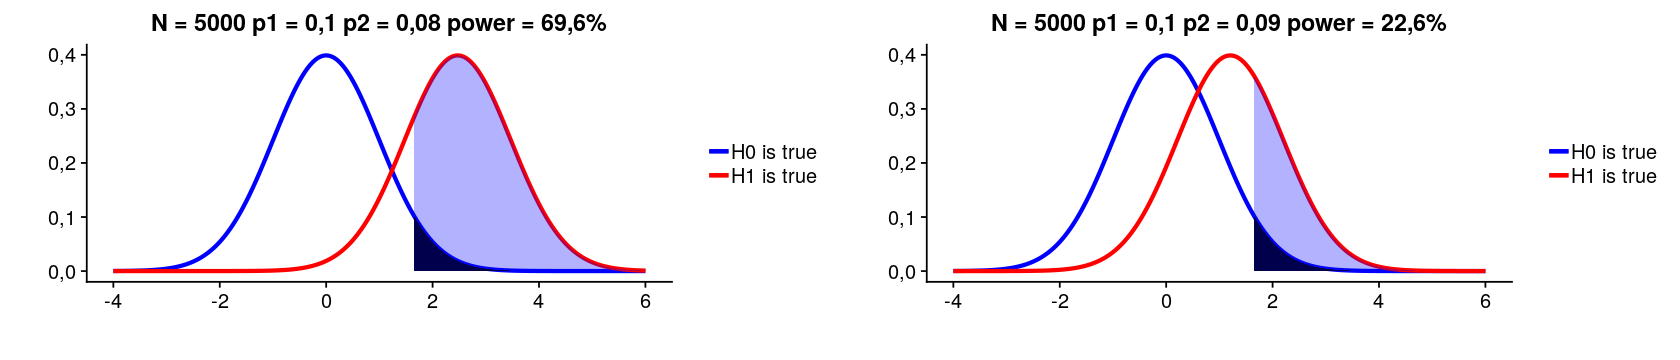

In [749]:
options(repr.plot.width=14, repr.plot.height=3)

alpha = 0.05
n1 = 2500
n2 = 2500
p1 = 0.10
p2 = 0.08
n_5000 = alpha_beta_functions_proportions(n1, n2, p1, p2, alpha)
n1 = 500
n2 = 500
n_1000 = alpha_beta_functions_proportions(n1, n2, p1, p2, alpha)

n1 = 2500
n2 = 2500
n_5000_1 = alpha_beta_functions_proportions(n1, n2, p1, p2, alpha)
p1 = 0.10
p2 = 0.09
n_5000_2 = alpha_beta_functions_proportions(n1, n2, p1, p2, alpha)

plot_grid(n_5000, n_1000)
plot_grid(n_5000_1, n_5000_2)



Note that if we pick a smaller N, or a smaller difference between p2 and p1, the power drops:

## POWER ANALYSIS -- DETECTABLE DIFFERENCE

### Two sided

In [750]:


p1 <- 0.1 # baseline rate
power <- 0.8 # power
alpha <- 0.05 # significance level
dd <- seq(from = 0.01, to = 0.03, by = 0.0001) # detectable differences
result <- data.frame(matrix(nrow = length(dd), ncol = 2))
names(result) <- c("DD", "ni")
for (i in 1:length(dd)) {
  result[i, "DD"] <- dd[i]
  result[i, "ni"] <- power.prop.test(sig.level = alpha, p1 = p1, p2 = p1 - dd[i],
                                     alternative = 'two.sided', power = power)$n
}

#head(result)

In [751]:
# Which is the effect size for n = 5000
result[ceiling(result$n / 10) * 10 == 5000, ]

,DD,ni
63,"0,0162","4990,617"


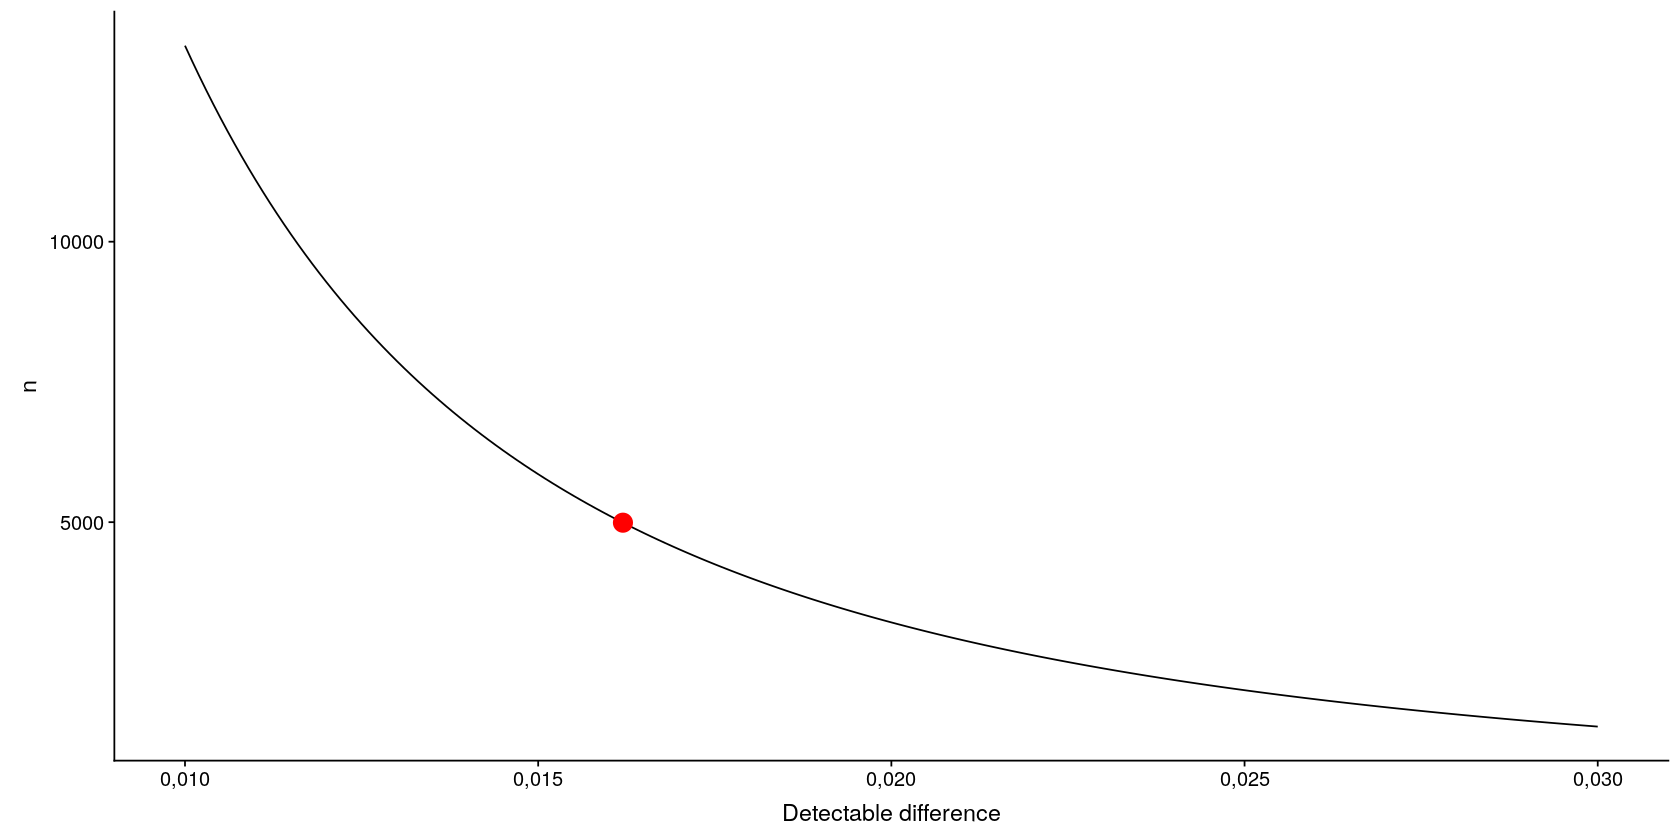

In [752]:
options(repr.plot.width=14, repr.plot.height=7)
ggplot(data = result, aes(x = DD, y = ni)) +
  geom_line() + ylab("n") + xlab("Detectable difference") + scale_x_continuous(labels = comma) +
  geom_point(data = result[ceiling(result$n / 10) * 10 == 5000, ],
             aes(x = DD, y = ni), colour = "red", size = 5)

## DIFERENCES OF MEANS

Power increases when
* ∆ =| µ1 − µ2 | increases
* n1 or n2 increases
* n1 and n2 are close
* σ decreases
* α increases

## Continous variable

## Problem to solve
The table shows data for two retail stores. It includes
the average weekly sales, the standard deviation of the data and the number of data points.
You are in charge of giving a bonus to the store managers based on performance. What
would you do?

![alt text](fig/TABLA.PNG)

In [786]:
# mean-variance
mean_1 = 800000
std_1 = 100000

mean_2 = 780000
std_2 = 30000
n1 = 50
n2 = 50

SE.1 <-  std_1 / sqrt(n1)               
SE.2 <-  std_2 / sqrt(n2)  
SE      <- sqrt( SE.1^2 + SE.2^2)  
Z       <- (mean_1 - mean_2) / SE  
Z #is the detectable difference, the size of the effect that we are looking for
SE

[1] 1,087857

[1] 18384,78

In [754]:
require(pwr)
pwr.t.test(d = .8, power = .9, sig.level = 0.05)


     Two-sample t test power calculation 

              n = 33,82555
              d = 0,8
      sig.level = 0,05
          power = 0,9
    alternative = two.sided

NOTE: n is number in *each* group


In [755]:
#power value
tau = mean_1 - mean_2
power_calculator(mu_t = (mean_1 + tau), mu_c = mean_1, sigma = SE,N = n1+n2)
power.t.test(n = n1, delta = (mean_1 - mean_2)/SE, sd = 1, alternative ="one.sided", type = "two.sample")
power.t.test(n = n1, delta = (mean_1 - mean_2), sd = SE, alternative = "two.sided", type = "two.sample")

[1] 0,9999993


     Two-sample t test power calculation 

              n = 50
          delta = 1,354571
             sd = 1
      sig.level = 0,05
          power = 0,9999998
    alternative = one.sided

NOTE: n is number in *each* group



     Two-sample t test power calculation 

              n = 50
          delta = 20000
             sd = 14764,82
      sig.level = 0,05
          power = 0,999999
    alternative = two.sided

NOTE: n is number in *each* group


N,power
18,"0,8195148"


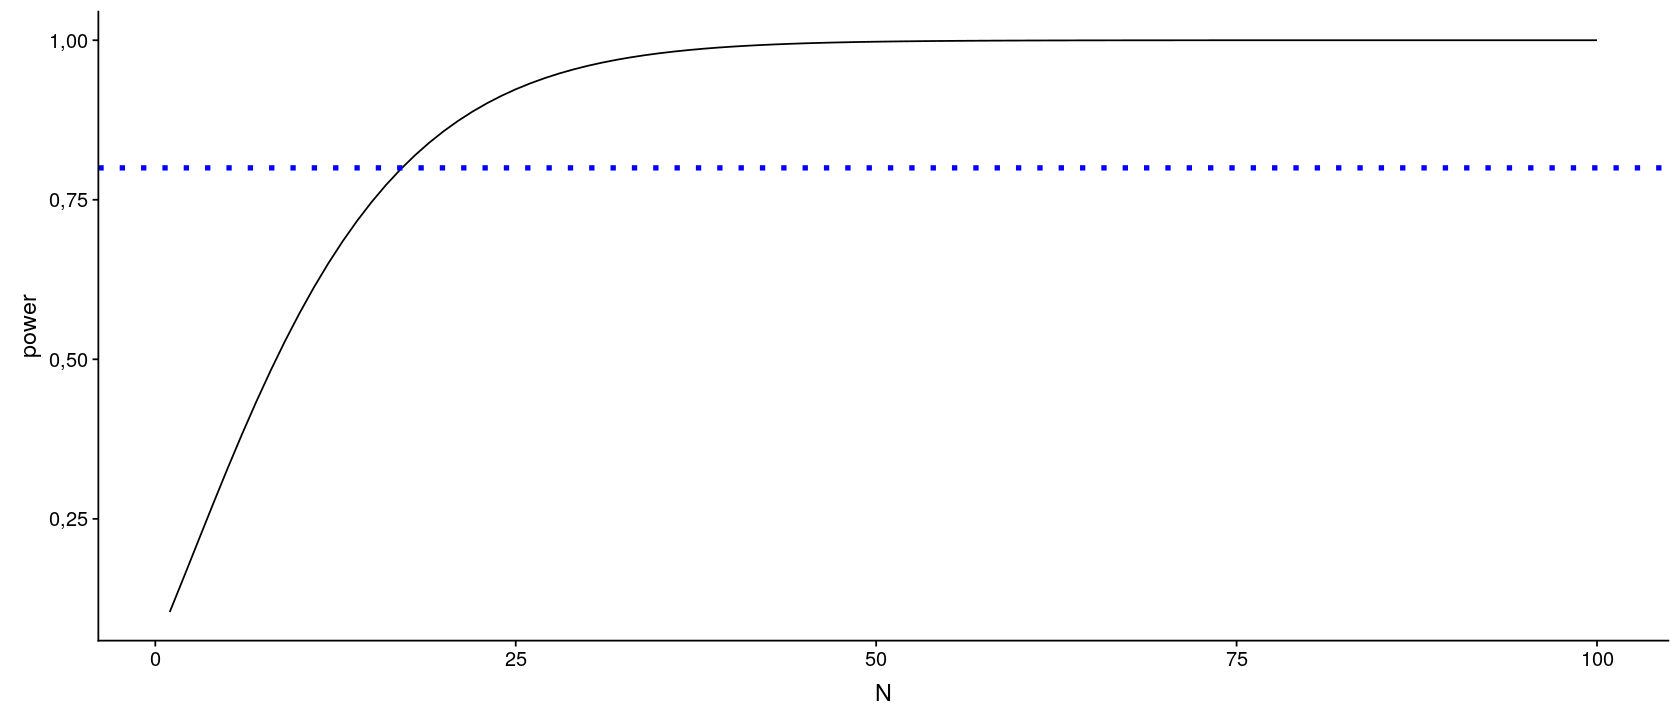

In [756]:
options(repr.plot.width=14, repr.plot.height=6)

Ns_small <- as.matrix(1:100)
Ns_big <- as.matrix(c(seq(1, 9999, 1), seq(1000, 100000000, 1000)))
tau = mean_1 - mean_2
sigma = SE
alpha = 0.05
betas_small <- apply(X=Ns_small,MARGIN = 1,FUN = power_calculator, mu_t= (mean_1 + tau), mu_c=mean_1, sigma=sigma,alpha=alpha)

dt = data.frame(cbind(Ns_small, betas_small))
names(dt) <- c('N', 'power')
xx = dt %>% filter(betas_small >.8)
xx= xx[1,]

d = ggplot(dt, aes(N, power)) + geom_line() +
geom_hline(yintercept = .8, linetype="dotted", 
                color = "blue", size=1.5)
#d + geom_point(data = xx, aes(x = N, y = betas))
d
xx

# Change in N, change in power

[1] 0,6057825
[1] 0,9578263
[1] 1,354571
[1] 2,346186
[1] 3,318008
[1] 4,283529


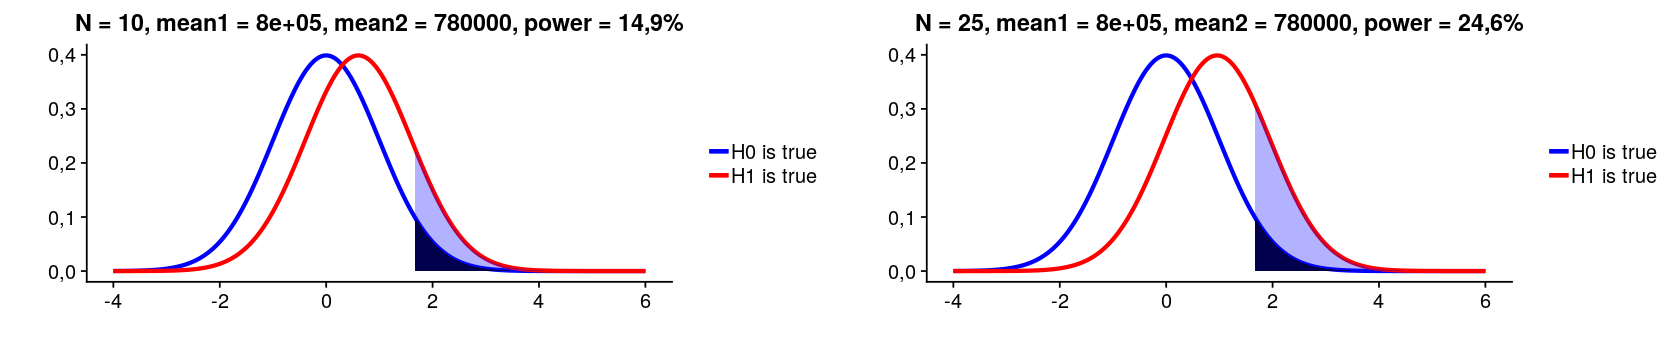

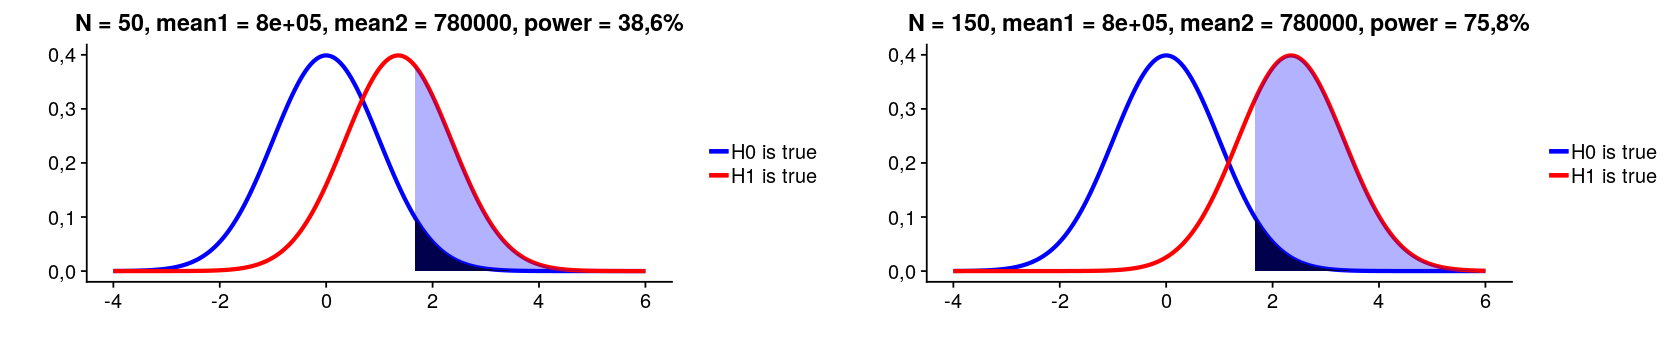

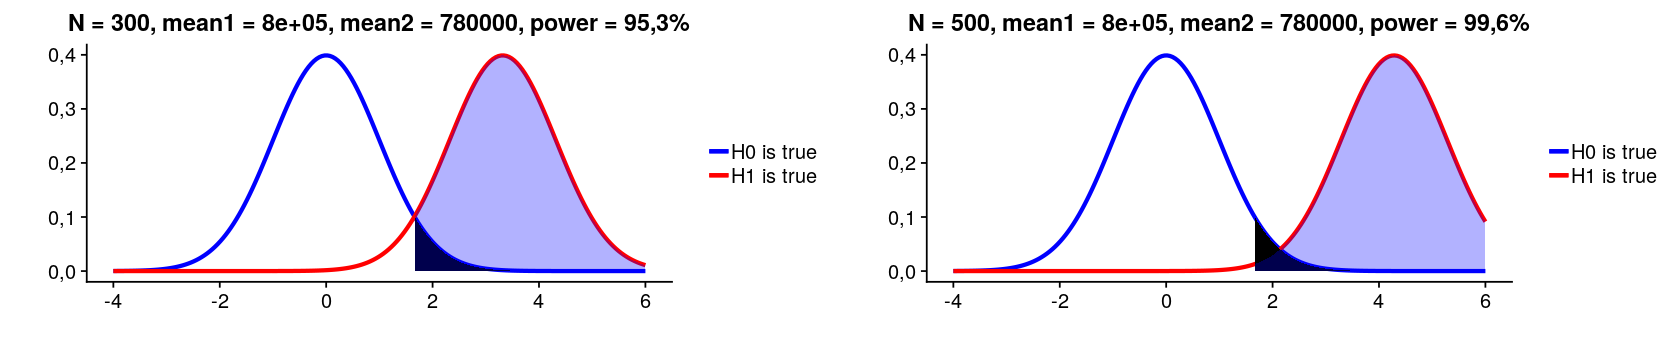

In [759]:
options(repr.plot.width=14, repr.plot.height=3)

# mean-variance
mean_1 = 800000
std_1 = 100000
mean_2 = 780000
std_2 = 30000

n1 = 10
n2 = 10
n_10 = alpha_beta_functions_continous(n1, n2, std_1, std_2, mean_1, mean_2, alpha = 0.05)

n1 = 25
n2 = 25
n_25 = alpha_beta_functions_continous(n1, n2, std_1, std_2, mean_1, mean_2, alpha = 0.05)

n1 = 50
n2 = 50
n_50 = alpha_beta_functions_continous(n1, n2, std_1, std_2, mean_1, mean_2, alpha = 0.05)


n1 = 150
n2 = 150
n_150 = alpha_beta_functions_continous(n1, n2, std_1, std_2, mean_1, mean_2, alpha = 0.05)


n1 = 300
n2 = 300
n_300 = alpha_beta_functions_continous(n1, n2, std_1, std_2, mean_1, mean_2, alpha = 0.05)

n1 = 500
n2 = 500
n_500 = alpha_beta_functions_continous(n1, n2, std_1, std_2, mean_1, mean_2, alpha = 0.05)

plot_grid(n_10, n_25)
plot_grid(n_50, n_150)
plot_grid(n_300, n_500)


[1] 1,354571
[1] 2,031856
[1] 2,709142
[1] 4,063713


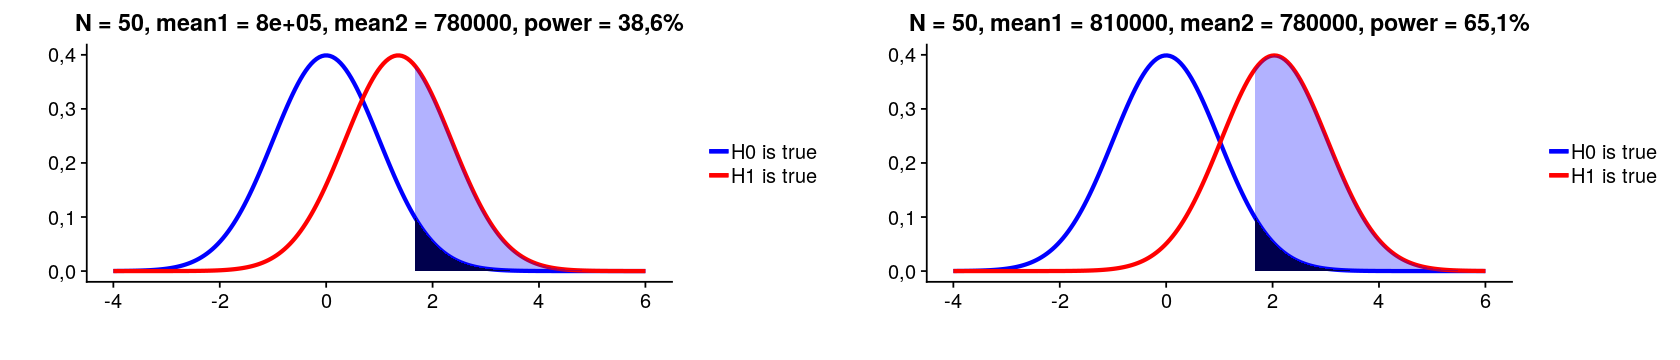

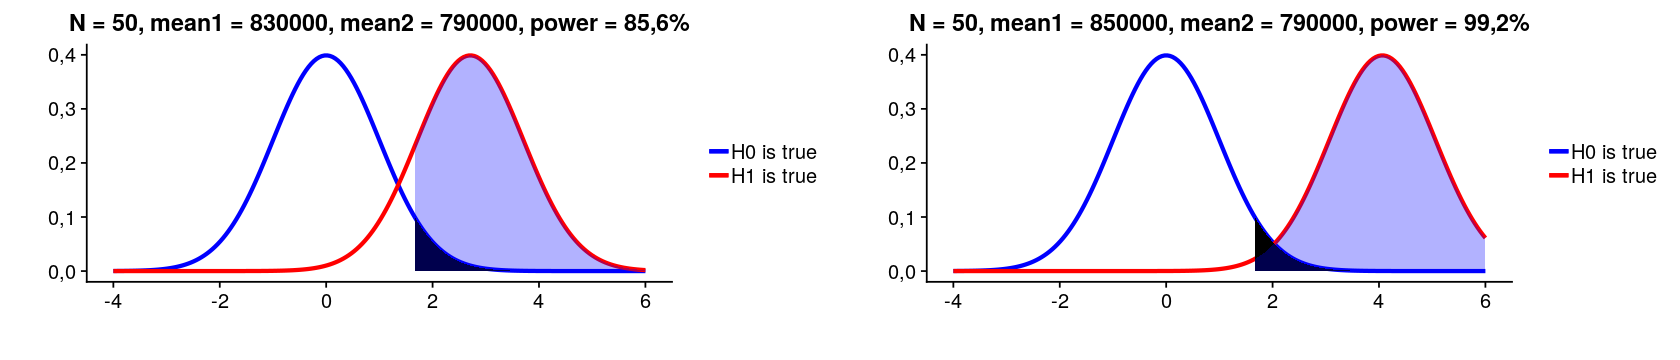

In [762]:

mean_1 = 800000
std_1 = 100000
mean_2 = 780000
std_2 = 30000
n1 = 50
n2 = 50
n_50_E = alpha_beta_functions_continous(n1, n2, std_1, std_2, mean_1, mean_2, alpha = 0.05)

mean_1 = 810000
std_1 = 100000
mean_2 = 780000
std_2 = 30000
n1 = 50
n2 = 50
n_15_E = alpha_beta_functions_continous(n1, n2, std_1, std_2, mean_1, mean_2, alpha = 0.05)


mean_1 = 830000
std_1 = 100000
mean_2 = 790000
std_2 = 30000
n1 = 50
n2 = 50
n_50_A = alpha_beta_functions_continous(n1, n2, std_1, std_2, mean_1, mean_2, alpha = 0.05)

mean_1 = 850000
std_1 = 100000
mean_2 = 790000
std_2 = 30000
n1 = 50
n2 = 50
n_100_A = alpha_beta_functions_continous(n1, n2, std_1, std_2, mean_1, mean_2, alpha = 0.05)

plot_grid(n_50_E, n_15_E)
plot_grid(n_50_A, n_100_A)

### Suppose that this experiment does not happen, and we can design our analysis.

In [717]:
pnorm(qnorm(0.95), mean= Z)

[1] 0,6142

In [718]:
# THis effect size is too large...
effect_size = 20000/SE # el efecto estandarizado es 1.35
effect_size


[1] 1,354571

In [559]:
# In order to look for a better one, we define the difference
effect_size = 20000/SE 
effect_size

[1] 1,354571

[1] "N = 9,61199641008832"
[1] "size effect = 1,355"


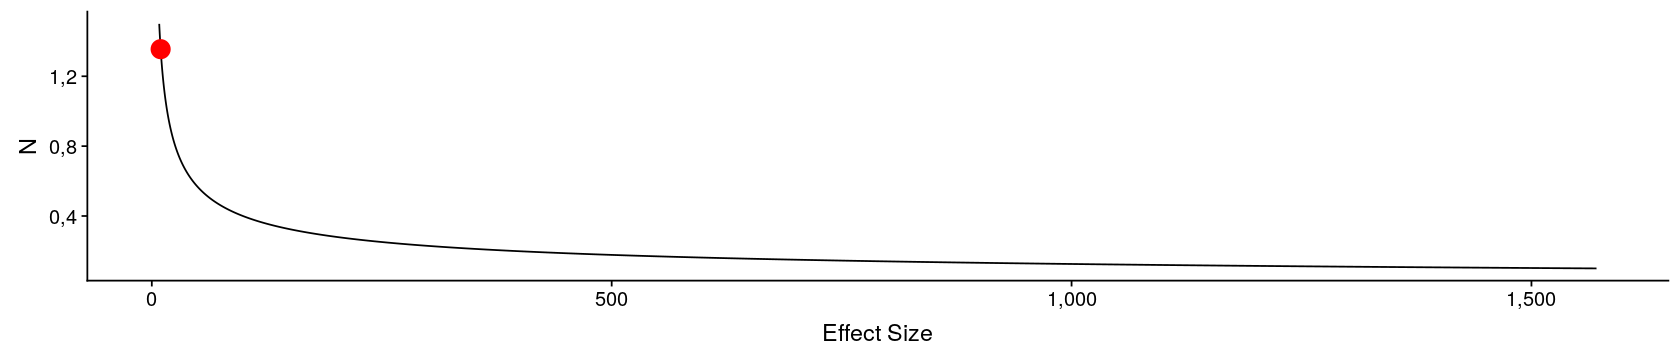

In [619]:
power <- 0.8 # power
alpha <- 0.05 # significance level7

es <- seq(from = 0.1, to = 1.5, by = 0.001) # effect sizes
result <- data.frame(matrix(nrow = length(es), ncol = 2))
names(result) <- c("ES", "ni")
for (i in 1:length(es)){
  result[i, "ES"] <- es[i]
  result[i, "ni"] <- power.t.test(sig.level = alpha, d = es[i], sd = 1,
                                  alternative = 'two.sided', power = power, type = "two.sample")$n  
}
#x = result[ceiling(result$n / 10) * 10 == 50, ]
#x = x[1, ]
x = result  %>% filter(ES >= effect_size)
x = x[1,]
ggplot(data = result, aes(x = ni, y = ES)) + geom_line() + xlab("Effect Size") + ylab("N") +
  scale_x_continuous(labels = comma) +
  geom_point(data = x,
             aes(x = ni, y = ES), colour = "red", size = 5)

print(paste0('N = ', x$ni))
print(paste0('size effect = ', x$ES))

Then, for a desired power of 80%, Type I error tolerance of 0.05, and a hypothesized effect size greater than 0.66, we should sample at least 223 **per group**.

[1] 2,246302


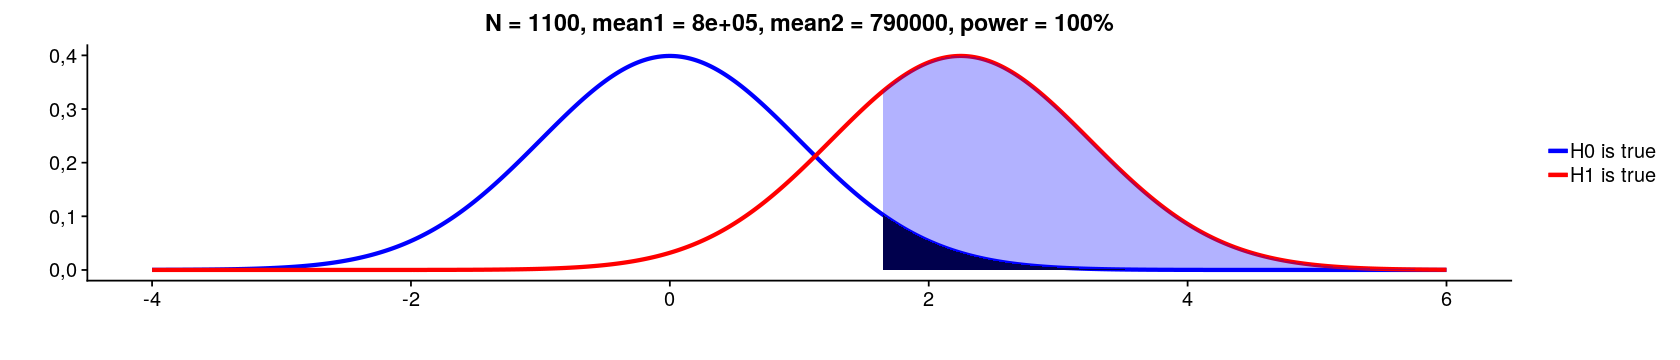

In [620]:
mean_1 = 800000
std_1 = 100000
mean_2 = 790000
std_2 = 30000
n1 = 550
n2 = 550
n_100_A = alpha_beta_functions_continous(n1, n2, std_1, std_2, mean_1, mean_2, alpha = 0.05)
n_100_A

## SIMULATION

In [662]:
N = 5000
mx = NULL
for (i in 1:N){
  x1 <- rnorm(50, mean = 800000, sd = 100000)
  x2 <- rnorm(50, mean = 780000, sd = 30000)
  
  xx1 = x1 #(x1 -mean(x1))/sd(x1)
  xx2 = x2 #(x2 -mean(x2))/sd(x2)
  mx = c(mx, mean(xx1) - mean(xx2))
}

In [667]:

# Using regression analysis.
xx1 = cbind(rep(0, length(xx1)), xx1)
xx2= cbind(rep(1, length(xx2)), xx2)

xx = rbind(xx1, xx2)
xx = as.data.frame(xx)
names(xx) <- c('store', 'sales')

#y = lm(sales  ~ store, xx)
#summary(y)
mylogit <- glm(store ~ sales, data = xx, family = "binomial")
summary(mylogit)


Call:
glm(formula = store ~ sales, family = "binomial", data = xx)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-2,409e-06  -2,409e-06   0,000e+00   2,409e-06   2,409e-06  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)   -26,57   50363,54  -0,001    1,000
sales          53,13   71224,81   0,001    0,999

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1,3863e+02  on 99  degrees of freedom
Residual deviance: 5,8016e-10  on 98  degrees of freedom
AIC: 4

Number of Fisher Scoring iterations: 25


TO conclude take a look to the tutorials:

* https://multithreaded.stitchfix.com/blog/2015/05/26/significant-sample/
* https://multithreaded.stitchfix.com/blog/2015/02/12/may-bayes-theorem-be-with-you/
* https://cran.r-project.org/web/packages/pwr/vignettes/pwr-vignette.html

# POWER ANALYSIS SIMULATOR

In [482]:
# mean-variance
mean_1 = 800000
std_1 = 100000
mean_2 = 780000
std_2 = 30000
n1 = 50
n2 = 50

SE.1 <-  std_1 / sqrt(n1)               
SE.2 <-  std_2 / sqrt(n2)  
SE      <- sqrt( SE.1^2 + SE.2^2)                        
Z       <- (mean_1 - mean_2) / SE  
Z 
SE

[1] 1,354571

[1] 14764,82

In [489]:
possible.ns <- seq(from=100, to=2000, by=50)     # The sample sizes we'll be considering
powers <- rep(NA, length(possible.ns))           # Empty object to collect simulation estimates
alpha <- 0.05                                    # Standard significance level
sims <- 500                                      # Number of simulations to conduct for each N

#### Outer loop to vary the number of subjects ####
for (j in 1:length(possible.ns)){
  N <- possible.ns[j]                              # Pick the jth value for N
  
  significant.experiments <- rep(NA, sims)         # Empty object to count significant experiments
  
  #### Inner loop to conduct experiments "sims" times over for each N ####
  for (i in 1:sims){
    #Y0 <-  rnorm(n=N, mean=mean_1, sd=SE)              # control potential outcome
    Y0 <-  rnorm(n=N, mean=60, sd=20)              # control potential outcome
    tau <- 5                                       # Hypothesize treatment effect
    Y1 <- Y0 + tau                                 # treatment potential outcome
    Z.sim <- rbinom(n=N, size=1, prob=.5)          # Do a random assignment
    Y.sim <- Y1*Z.sim + Y0*(1-Z.sim)               # Reveal outcomes according to assignment
    fit.sim <- lm(Y.sim ~ Z.sim)                   # Do analysis (Simple regression)
    p.value <- summary(fit.sim)$coefficients[2,4]  # Extract p-values
    significant.experiments[i] <- (p.value <= alpha) # Determine significance according to p <= 0.05
  }
  
  powers[j] <- mean(significant.experiments)       # store average success rate (power) for each N
}
#plot(possible.ns, powers, ylim=c(0,1))




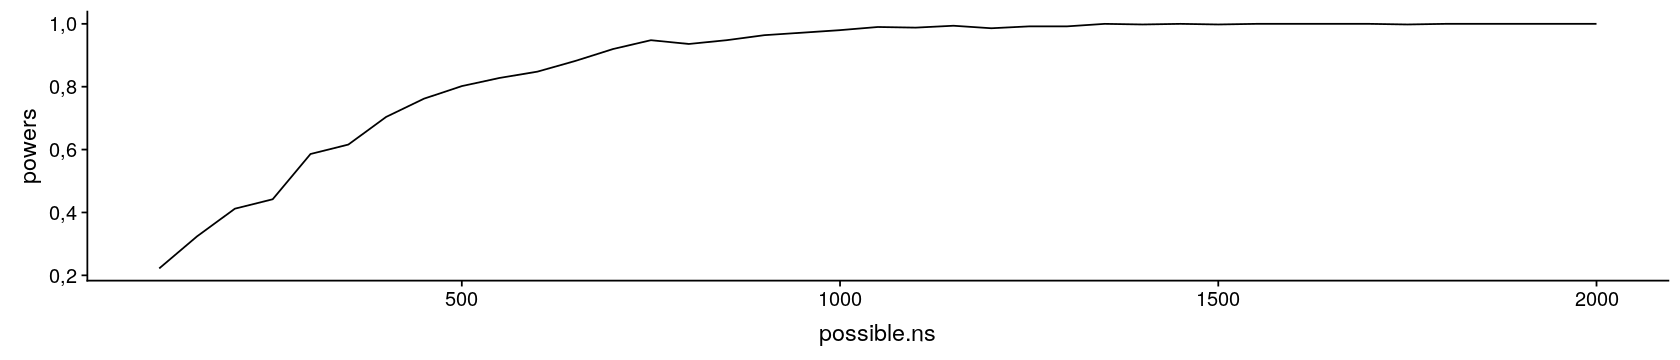

In [490]:
dt = data.frame(cbind(possible.ns, powers))
ggplot(dt, aes(x =possible.ns, y = powers)) + geom_line()

##  MORE SIMULATIONS

First step is to identify the sample size necessary to meet our requirements:

* Detects an effect size of 0.5
* Power = 0.80
* α = 0.05
* two-sided t-test

In [779]:
library(ggplot2)
library(pwr)

t_test_pwr <- pwr.t.test(d = .5,
                         power = 0.80, sig.level = 0.05,
                         alternative = 'two.sided')
print(t_test_pwr)


     Two-sample t test power calculation 

              n = 63,76561
              d = 0,5
      sig.level = 0,05
          power = 0,8
    alternative = two.sided

NOTE: n is number in *each* group



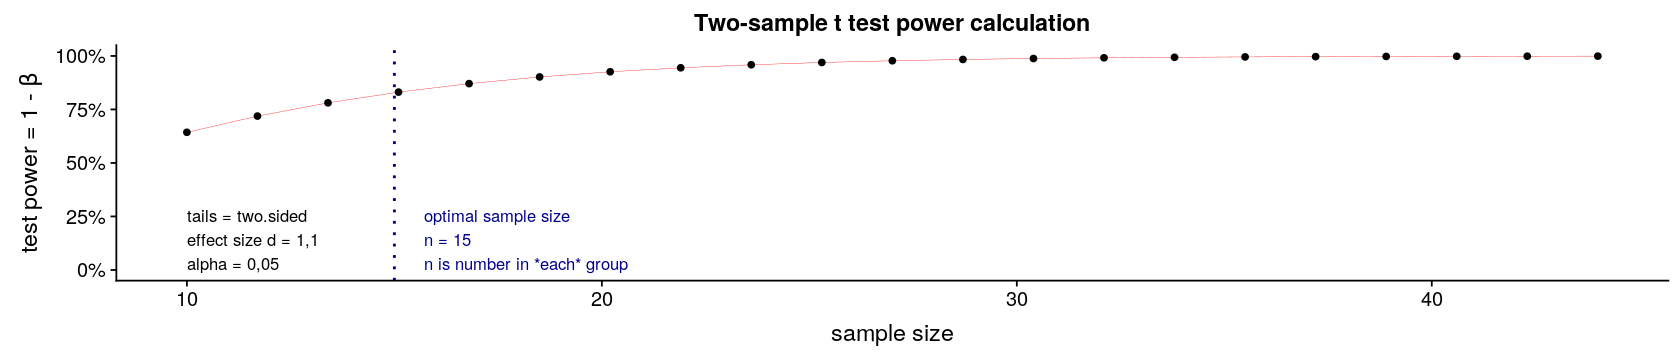

In [778]:
plot(t_test_pwr)

I wrote a small function to create random samples of an experiment.

In [780]:

perform_t_test <- function(n,mu_a, mu_b, s){
  group_a <- rnorm(n, mean = mu_a, sd = s)
  group_b <- rnorm(n, mean = mu_b, sd = s)
  t.test(group_a, group_b)$p.value
}

In [781]:
n <- 25
mu_a <- 80
mu_b <- 75
s <- 10

cohen_d <- (mu_a - mu_b)/s

effect_detected_percent <- mean(
  replicate(1000, perform_t_test(n, mu_a, mu_b, s)) < 0.05)

print(cohen_d)
print(effect_detected_percent)


[1] 0,5
[1] 0,392


The results show the null hypothesis is only rejected 41% of the time assuming we are using an α of 0.05.

In [782]:
n <- 80
effect_detected_percent <- mean(
  replicate(1000, perform_t_test(n, mu_a, mu_b, s)) < 0.05)
print(effect_detected_percent)

[1] 0,912


What can happen if I perform an experiment that is overpowered? In the case of a trial that uses animals or humans there are ethical concerns in addition to the added cost and waste of resources. In addition to these issues, an overpowered experiment is more likely to detect extremely small effects as significant. Take the example below. Say my two groups have mean test scores of 80 and 80.5, but the standard deviation of the groups is 25 points instead of 10.

In [784]:
n <- 8000
mu_a <- 80
mu_b <- 80.5
s <- 25

cohen_d <- abs(mu_a - mu_b)/s
effect_detected_percent <- mean(
  replicate(1000, perform_t_test(n, mu_a, mu_b, s)) < 0.05)

print(cohen_d)
print(effect_detected_percent)

[1] 0,02
[1] 0,255


As a result the effect is only 0.02, but the null hypothesis is rejected in 23% of the experiments. This means 23% of the time we would find a significant result that would cause us to reject the null hypothesis, but knowing the data a priori, we know that the effect is negligible and there is most likely no real difference between the two groups.

If we use the same means and standard deviation and adjust to a smaller sample size, 80, we see the null hypothesis is only rejected 5.6% of the time.

In [785]:
n <- 80
mu_a <- 80
mu_b <- 80.5
s <- 25

cohen_d <- abs(mu_a - mu_b)/s
effect_detected_percent <- mean(
  replicate(1000, perform_t_test(n, mu_a, mu_b, s)) < 0.05)

print(cohen_d)
print(effect_detected_percent)

[1] 0,02
[1] 0,056


## BAYES 

https://multithreaded.stitchfix.com/blog/2015/02/12/may-bayes-theorem-be-with-you/
https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers


However, all practitioners in data science and statistics would benefit from integrating Bayesian techniques into their arsenal. This post discusses two reasons why:

1. Bayesian statistics offers a framework to handle uncertainty that is based on a more intuitive mental model than the frequentist paradigm.

2. Bayesian regression has close ties to regularization techniques while also giving us a principled approach to explicitly expressing prior beliefs. This helps us combat multicollinearity and overfitting.

* **Frequentist paradigm**:  the parameter is fixed and unknown, while the data is random.
* Bayesian paradigm: The data is fixed, the parameter is random


Bayesian analysis is formalized by creating a prior belief and combining it with the likelihood (observed data) to get to the posterior distribution (the final distribution). Priors encode the information that you already have - i.e., they are a way of expressing the results of previous experiments. In other words, yesterday’s posterior is today’s prior.

This is done via Bayes Theorem, which says that the posterior distribution is proportional to the product of the likelihood and the priors:

$p(μ∣x)∝likelihood×prior=p(x∣μ)×p(μ)$